In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from scipy import ndimage
from scipy.optimize import minimize

# Utilities
from fitting import Fit_Gaussian
from pattern import Lattice, Squares, Binary_Squares
from binary import Binary_Images

In [2]:
img = "actin.tif"
mask = "Mask.tif"
pattern = "pattern.tif"
date = "data/data_400_20190208"
cell = "cell_1_1"
l = 15
l_min = 0.7
l_max = 1.3
img_scale = 10

In [3]:
# Read the image to be cut and the mask you will cut on
image = io.imread('{}/{}/{}'.format(date, cell, img))
Pattern = io.imread('{}/{}/{}'.format(date, cell, pattern))
mask = io.imread('{}/{}/{}'.format(date, cell, mask))
        
# Create the two stacks of binary images to check the pattern
mini_images = Binary_Squares(img = Pattern,
                             coordinate = '{}/{}/coordinates.csv'.format(date, cell),
                             l = l,
                             img_scale = img_scale,
                             l_min = l_min,
                             l_max = l_max)
        
pattern_dots, pattern_shifted_dots = mini_images.masked_squares(mask)
        
        
# Create the two stacks of binary images
mini_images = Binary_Squares(img = image,
                             coordinate = '{}/{}/coordinates.csv'.format(date, cell),
                             l = l,
                             img_scale = img_scale,
                             l_min = l_min,
                             l_max = l_max)
        
dots, shifted_dots = mini_images.masked_squares(mask)
        
print('The number of mini images = {}'.format(2*dots.shape[0]))

The number of mini images = 144


Text(0.5, 1.0, 'off dot')

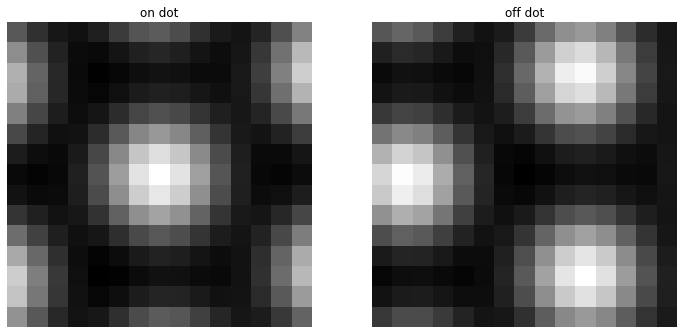

In [4]:
# display the average of the pattern to verify the quality of the localization
plt.figure(figsize=(12,6))
        
plt.subplot(121)
plt.imshow(np.mean(pattern_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('on dot')
    
plt.subplot(122)
plt.imshow(np.mean(pattern_shifted_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('off dot')

Text(0.5, 1.0, 'off dot')

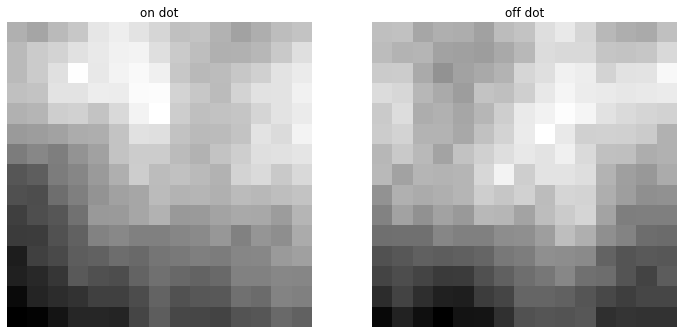

In [5]:
# display the average of the pattern to verify the quality of the localization
plt.figure(figsize=(12,6))
        
plt.subplot(121)
plt.imshow(np.mean(dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('on dot')
    
plt.subplot(122)
plt.imshow(np.mean(shifted_dots, axis= 0), cmap ='gray')
plt.axis('off')
plt.title('off dot')

In [6]:
dots.min()

127

In [7]:
binary_pattern = Binary_Images(pattern_dots, pattern_shifted_dots)
X_train, X_test, y_train, y_test = binary_pattern.train_test_seed(seed = 0, norm = 'mean')